In [1]:
import sys
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import pathlib
import h5py 

sys.path.insert(1, '/Users/anneerickson/git/Robofly_Analysis_2024/')
from melis_etal_robofly import robofly_analysis_ae
%matplotlib inline

F scaling
0.0243594260182162

M scaling
0.000263081800996735

['1070_L_25_stim_wb_n_0_results.mat', '1070_L_25_stim_wb_n_10_results.mat', '1070_L_25_stim_wb_n_11_results.mat', '1070_L_25_stim_wb_n_12_results.mat', '1070_L_25_stim_wb_n_13_results.mat', '1070_L_25_stim_wb_n_14_results.mat', '1070_L_25_stim_wb_n_15_results.mat', '1070_L_25_stim_wb_n_16_results.mat', '1070_L_25_stim_wb_n_17_results.mat', '1070_L_25_stim_wb_n_18_results.mat', '1070_L_25_stim_wb_n_19_results.mat', '1070_L_25_stim_wb_n_1_results.mat', '1070_L_25_stim_wb_n_2_results.mat', '1070_L_25_stim_wb_n_3_results.mat', '1070_L_25_stim_wb_n_4_results.mat', '1070_L_25_stim_wb_n_5_results.mat', '1070_L_25_stim_wb_n_6_results.mat', '1070_L_25_stim_wb_n_7_results.mat', '1070_L_25_stim_wb_n_8_results.mat', '1070_L_25_stim_wb_n_9_results.mat', '1070_L_baseline_wb_n_0_results.mat', '1070_L_stim_wb_n_0_results.mat', '1070_R_25_stim_wb_n_0_results.mat', '1070_R_25_stim_wb_n_10_results.mat', '1070_R_25_stim_wb_n_11_results.mat', '1

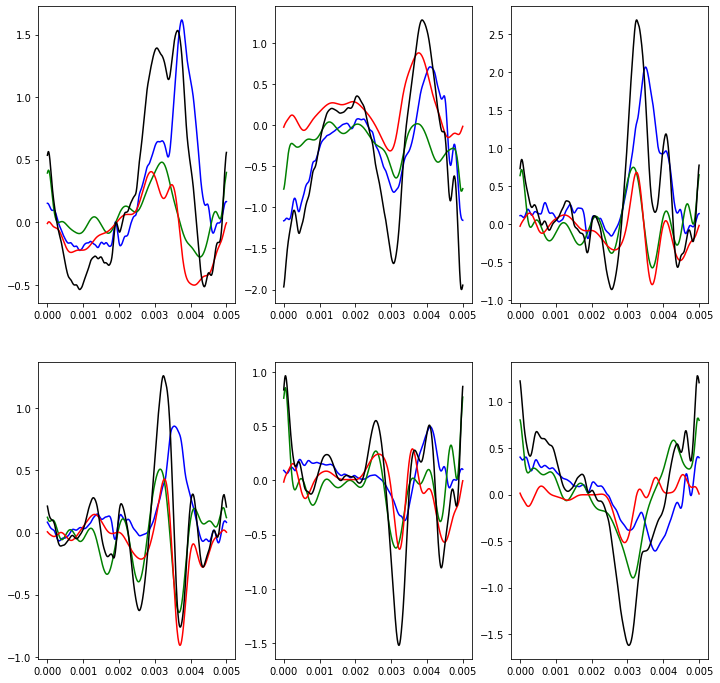

In [2]:
save_plot_folder = '/Volumes/My Passport for Mac/robofly/coef_for_robofly_updated_eta_bounds/1070/with_johan_code/'
file_loc = '/Volumes/My Passport for Mac/robofly/coef_for_robofly_updated_eta_bounds/1070/results'

RA = robofly_analysis_ae.RoboAnalysis()


file_name_list1 = []
for (dirpath, dirnames, filenames) in os.walk(file_loc):
    file_name_list1.extend(filenames)
    break

# print(file_name_list1)

file_name_list = []
for file_n in file_name_list1:
    if 'results' in file_n:
        file_name_list.append(file_n)

print(file_name_list)


baseline_list = RA.get_L_R_fnames_avg(file_name_list, period='baseline')

       
body_cg = np.array([ 0.03604015,0.0,-0.23981816])

RA.set_body_cg(body_cg)

cg_L = np.array([[-0.16080577],
 [ 1.30565967],
 [ 0.        ]])

M_L  = np.array([[ 1.60788240e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00, 0.00000000e+00, -2.09934721e-09],
 [ 0.00000000e+00,  1.60788240e-09,  0.00000000e+00, -0.00000000e+00, 0.00000000e+00, -2.58556764e-10],
 [ 0.00000000e+00,  0.00000000e+00,  1.60788240e-09,  2.09934721e-09, 2.58556764e-10,  0.00000000e+00],
 [ 0.00000000e+00, -0.00000000e+00,  2.09934721e-09,  6.31819550e-09, 5.47450644e-10,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00,  2.58556764e-10,  5.47450644e-10, 3.55374010e-10,  0.00000000e+00],
 [-2.09934721e-09, -2.58556764e-10,  0.00000000e+00,  0.00000000e+00, 0.00000000e+00,  6.67356951e-09]])

cg_R = np.array([[-0.16080577],
 [-1.30565967],
 [ 0.        ]])

M_R  = np.array([[ 1.60788240e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00, 2.09934721e-09],
 [ 0.00000000e+00,  1.60788240e-09,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -2.58556764e-10],
 [ 0.00000000e+00,  0.00000000e+00,  1.60788240e-09, -2.09934721e-09,  2.58556764e-10,  0.00000000e+00],
 [ 0.00000000e+00, -0.00000000e+00, -2.09934721e-09,  6.31819550e-09, -5.47450644e-10,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00,  2.58556764e-10, -5.47450644e-10,  3.55374010e-10,  0.00000000e+00],
 [ 2.09934721e-09, -2.58556764e-10,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.67356951e-09]])


#keep this or change? to strk_shift[0,0]
beta = -(65/180)*np.pi
RA.set_srf_angle(beta)
RA.set_Inertia_tensors(cg_L,M_L,cg_R,M_R)

strk_shift = np.array([
    [0,-(13/180)*np.pi]])

phi_shift_i = strk_shift[0,1]
beta_i = strk_shift[0,0]

# Convert #just load left wing for now

RA.load_mat_file(file_loc,baseline_list[0])
RA.convert_to_SRF(beta_i,phi_shift_i)
RA.add_data_to_list()
print(file_name_list)

In [3]:
# #look at shift_eta, L wing 

# RA.load_mat_file(file_loc,baseline_list[0])
# RA.convert_to_SRF(beta_i,phi_shift_i, shift_eta=True)
# RA.add_data_to_list()
# print(file_name_list)

In [4]:
#plot baseline lollipops with wingtip forces
color = [(0.5451,0.0,0.0)]
L_index = [0] #R_index = 1

RA.make_lollipop_figure(L_index,'baseline_',save_plot_folder + 'lollipops/',color[0],0)

0


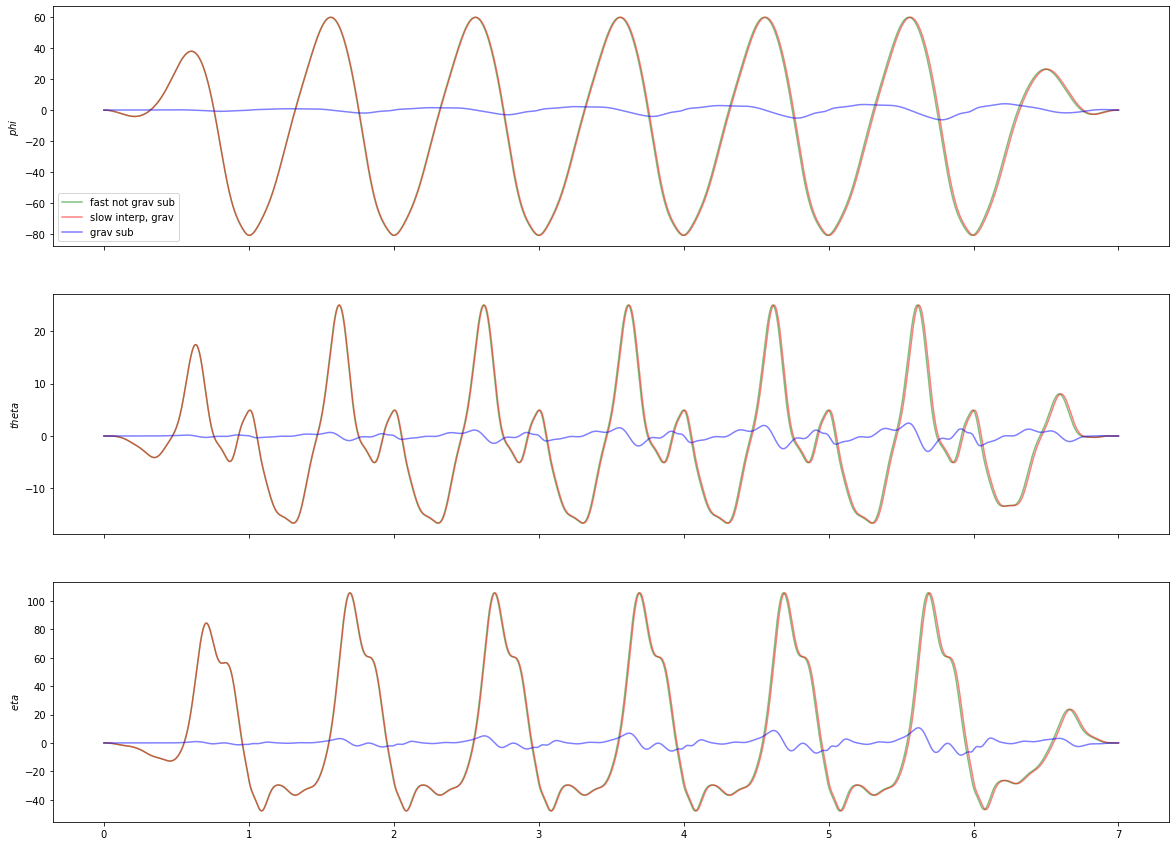

In [5]:
# now look at wing kinematics for grav subtraction model (default)
RA.align_kinematics_slow_fast_for_grav_sub_viz(save_plot_folder + 'grav_subtraction/', side='L')

In [ ]:
# even when shift eta, doesnt change value of min? look into 

In [3]:
baseline_list

['1070_L_baseline_wb_n_0_results.mat', '1070_R_baseline_wb_n_0_results.mat']

eta min robofly: -112.93659220000002
eta min flyami: -112.96863598295954


/Users/anneerickson/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/anneerickson/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


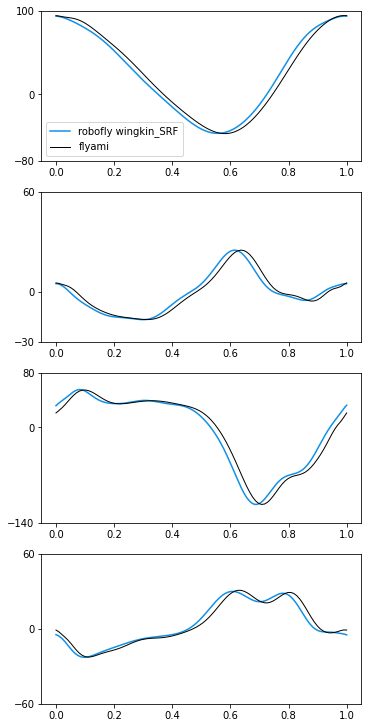

In [6]:
#data_fpath = '/Users/anneerickson/Documents/Caltech/Dickinson/Flyami_analysis/prelim_geno_plots/NDF_removed_0.5s_combined/with_timestamps/1070_individual_flies_wb_a.hdf5'
#data = h5py.File(data_fpath, 'r')

data_movie_fpath= '/Users/anneerickson/Documents/Caltech/Dickinson/Flyami_analysis/prelim_geno_plots/NDF_removed_0.5s_combined/with_timestamps/1070_individual_flies_movies_wb_a.hdf5'
data = h5py.File(data_movie_fpath, 'r')

RA.plot_flyami_wingkin_robofly_input_overlay(data, save_plot_folder + 'kinematic_comparisons/', save_fig=True, side='L', time_period='baseline')